In [2]:
from astropy.table import Table, column
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

import sys
sys.path.append('../astro_codes/')
from luminosities_magnitudes_and_distances import mag_to_Mag

In [3]:
gama_classifications = Table.read('GAMA_fits/galaxy_zoo_gama_cleaned.fits')
gama_raw = Table.read('GAMA_fits/galaxy_zoo_gama_reduced.fits')
gama_ancillary = Table.read('GAMA_fits/galaxy_zoo_gama_extra.fits')

In [12]:
N_names = [c for c in gama_raw.colnames if 'total' in c]
for n in N_names:
    gama_classifications[n + '_raw'] = gama_raw[n]

49228/49851 have reasonable sizes and brightnesses


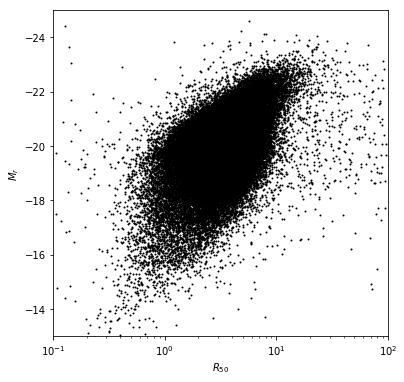

In [14]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

R50 = gama_ancillary['GALRE_r_kpc']
Mr = gama_ancillary['absmag_r']

_ = ax.scatter(R50,Mr,color='k',s=1)
_ = ax.set_xscale('log')
_ = ax.set_xlim(10**(-1),10**2)
_ = ax.set_ylim(-13,-25)
_ = ax.set_xlabel('$R_{50}$')
_ = ax.set_ylabel('$M_r$')

R_ok = np.all([R50>0,R50<20],axis=0)
Mr_ok = np.all([Mr<-10,Mr>-25],axis=0)
data_ok = (R_ok) & (Mr_ok)

gama_data = gama_classifications[data_ok]
for c in ('absmag_r','GALRE_r_kpc','Z_TONRY'):
    gama_data[c] = gama_ancillary[data_ok][c] 

print('{}/{} have reasonable sizes and brightnesses'.format(data_ok.sum(),len(data_ok)))

M_r (limit) = -18.915185519784764


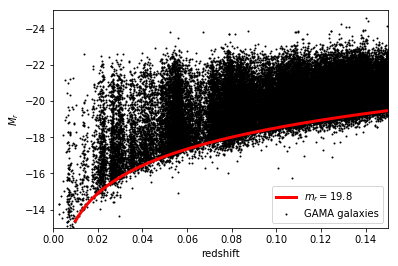

In [15]:
zs = np.linspace(0.01,0.15,100)
Mags = mag_to_Mag(19.8,zs)

_ = plt.scatter(gama_data['Z_TONRY'],gama_data['absmag_r'],color='k',s=1,
                label='GAMA galaxies')
_ = plt.plot(zs,Mags,color='r',label='$m_r=19.8$',lw=3)
_ = plt.xlabel('redshift')
_ = plt.ylabel('$M_r$')
_ = plt.legend(loc='lower right')

Mag_limit = mag_to_Mag(19.4,0.1)
print('M_r (limit) = {}'.format(Mag_limit))

_ = plt.axis((0,0.15,-13,-25))

In [16]:
gama_data.write('GAMA_fits/gama_to_debias.fits',overwrite=True)